**2. Data Preprocessing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
#Path
Instapath = "Instagram_Data.xlsx"

#Turn it to dataframe
InstagramDataframe = pd.read_excel(Instapath)
printable = InstagramDataframe.head()
#Show head of data means 5 rows
print("First 5 rows of dataset= \n")
print(printable)




First 5 rows of dataset= 

        Date  Screen Time (minutes)  Number of Sessions Most Active Time  \
0 2023-10-01                  129.6                   9            Night   
1 2023-10-02                   82.2                   6          Evening   
2 2023-10-03                  175.5                  13          Morning   
3 2023-10-04                  135.0                  10        Afternoon   
4 2023-10-05                   82.6                   7          Morning   

   Browsing (%)  Posting (%)  Messaging (%)  Watching (%)  Likes  Comments  \
0          48.2         12.2           11.0          28.6   33.0       8.0   
1          46.9         13.7           23.6          15.8   22.0       4.0   
2          57.0          7.5           16.3          19.1   33.0       6.0   
3          44.2         10.0           17.4          28.4   22.0       6.0   
4          57.4          7.1           14.7          20.8   13.0       4.0   

   Messages  
0        11  
1         5  
2    

In [ ]:
#Print last 5 rows
printable = InstagramDataframe.tail()
print("Last 5 rows of dataset= \n")
print(printable)


Last 5 rows of dataset= 

          Date  Screen Time (minutes)  Number of Sessions Most Active Time  \
394 2024-10-26                   84.8                   8          Morning   
395 2024-10-27                  102.6                   9          Morning   
396 2024-10-28                   47.2                   4          Morning   
397 2024-10-29                  171.6                  13        Afternoon   
398 2024-10-30                  154.8                  12            Night   

     Browsing (%)  Posting (%)  Messaging (%)  Watching (%)  Likes  Comments  \
394          45.3         11.7           19.8          23.2   13.0       2.0   
395          54.0          6.3           20.5          19.2   18.0       4.0   
396          46.4         13.8           12.8          26.9   13.0       3.0   
397          37.0         14.1           30.0          18.9   51.0       8.0   
398          38.8         13.9           28.1          19.2   17.0       2.0   

     Messages  
394     

In [ ]:

statistics = printable.describe()
#Statistics in summary
print("General statistics of dataset= \n")
print(statistics)



General statistics of dataset= 

                      Date  Screen Time (minutes)  Number of Sessions  \
count                    5               5.000000            5.000000   
mean   2024-10-28 00:00:00             112.200000            9.200000   
min    2024-10-26 00:00:00              47.200000            4.000000   
25%    2024-10-27 00:00:00              84.800000            8.000000   
50%    2024-10-28 00:00:00             102.600000            9.000000   
75%    2024-10-29 00:00:00             154.800000           12.000000   
max    2024-10-30 00:00:00             171.600000           13.000000   
std                    NaN              51.017252            3.563706   

       Browsing (%)  Posting (%)  Messaging (%)  Watching (%)      Likes  \
count      5.000000     5.000000       5.000000       5.00000   5.000000   
mean      44.300000    11.960000      22.240000      21.48000  22.400000   
min       37.000000     6.300000      12.800000      18.90000  13.000000   
25%  

In [ ]:
informations = printable.info()

#Information about dataset
print("Information about dataset= \n")
print(informations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 394 to 398
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5 non-null      datetime64[ns]
 1   Screen Time (minutes)  5 non-null      float64       
 2   Number of Sessions     5 non-null      int64         
 3   Most Active Time       5 non-null      object        
 4   Browsing (%)           5 non-null      float64       
 5   Posting (%)            5 non-null      float64       
 6   Messaging (%)          5 non-null      float64       
 7   Watching (%)           5 non-null      float64       
 8   Likes                  5 non-null      float64       
 9   Comments               5 non-null      float64       
 10  Messages               5 non-null      int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 572.0+ bytes
Information about dataset= 

None


In [ ]:

Missingscurrently = InstagramDataframe.isnull().sum()
print("Values missing from each column= ", Missingscurrently)

InstagramDataframe = InstagramDataframe.dropna(subset=["Date", "Screen Time (minutes)"])

#Add the middle of the empty numbers to the columns of numbers
integerscell = InstagramDataframe.select_dtypes(include=["float64", "int64"]).columns
InstagramDataframe[integerscell] = InstagramDataframe[integerscell].fillna(InstagramDataframe[integerscell].median())
print("Median value for each column put to missing cells")
Nothandled = len(InstagramDataframe)
#Take care of two or more rows

InstagramDataframe = InstagramDataframe.drop_duplicates()
handledasunique = len(InstagramDataframe)
print(f"Deleted {Nothandled - handledasunique} same rows twice")

#Make sure right types of info
InstagramDataframe["Date"] = pd.to_datetime(InstagramDataframe["Date"])

InstagramDataframe["Most Active Time"] = InstagramDataframe["Most Active Time"].astype("category")

# Final cleaned dataset
print("Now data is cleaned. Final version= \n")
res = InstagramDataframe.head()
print(res)




Values missing from each column=  Date                     0
Screen Time (minutes)    0
Number of Sessions       0
Most Active Time         0
Browsing (%)             0
Posting (%)              0
Messaging (%)            3
Watching (%)             4
Likes                    2
Comments                 2
Messages                 0
dtype: int64
Median value for each column put to missing cells
Deleted 3 same rows twice
Now data is cleaned. Final version= 

        Date  Screen Time (minutes)  Number of Sessions Most Active Time  \
0 2023-10-01                  129.6                   9            Night   
1 2023-10-02                   82.2                   6          Evening   
2 2023-10-03                  175.5                  13          Morning   
3 2023-10-04                  135.0                  10        Afternoon   
4 2023-10-05                   82.6                   7          Morning   

   Browsing (%)  Posting (%)  Messaging (%)  Watching (%)  Likes  Comments  \
0      

In [ ]:
print("I will create average session duration feature with using number of sessions and screen time. ")

InstagramDataframe["Number of Sessions"].replace(0, 1, inplace=True)

#calculating average session duration from scrren time and number of sessions
calculated = InstagramDataframe["Screen Time (minutes)"] / InstagramDataframe["Number of Sessions"]
InstagramDataframe["average session duration"] = calculated

print("New feature in first 5 row= ")
printable = InstagramDataframe[["Screen Time (minutes)", "Number of Sessions", "average session duration"]].head()
print(printable)


I will create average session duration feature with using number of sessions and screen time. 
New feature in first 5 row= 
   Screen Time (minutes)  Number of Sessions  average session duration
0                  129.6                   9                      14.4
1                   82.2                   6                      13.7
2                  175.5                  13                      13.5
3                  135.0                  10                      13.5
4                   82.6                   7                      11.8


<ipython-input-52-93b7b53e177b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  InstagramDataframe["Number of Sessions"].replace(0, 1, inplace=True)


**3. Exploratory Data Analysis (EDA)**

In [ ]:
#In this Part, I will test correlations

C1 = InstagramDataframe["Screen Time (minutes)"].corr(InstagramDataframe["Number of Sessions"])
print(f"Correlation of screen time and number of sessions = {C1:.2f}")

C2 = InstagramDataframe["Screen Time (minutes)"].corr(InstagramDataframe["Likes"])
print(f"Correlation of screen time and likes = {C2:.2f}")

C3 = InstagramDataframe["Number of Sessions"].corr(InstagramDataframe["Comments"])
print(f"Correlation of number of sessions and comments = {C3:.2f}")

C4 = InstagramDataframe["Posting (%)"].corr(InstagramDataframe["Screen Time (minutes)"])
print(f"Correlation of posting and screen time: {C4:.2f}")

Correlation of screen time and number of sessions = 0.96
Correlation of screen time and likes = 0.80
Correlation of number of sessions and comments = 0.66
Correlation of posting and screen time: -0.03


In [ ]:


InstagramDataframe['Date'] = pd.to_datetime(InstagramDataframe['Date'])

# Getting day week and months
InstagramDataframe['Day'] = InstagramDataframe['Date'].dt.day_name()

InstagramDataframe['Month'] = InstagramDataframe['Date'].dt.month_name()

InstagramDataframe['Week'] = InstagramDataframe['Date'].dt.isocalendar().week



# Then I extract daily patterns
daypatterns = InstagramDataframe.groupby('Day')['Screen Time (minutes)'].mean()

# Then I extract week patterns
weeks = InstagramDataframe.groupby('Week')['Likes'].sum()


# Then I extract month patterns

M = InstagramDataframe.groupby('Month')['Number of Sessions'].mean()


#Summary statistic

Summ = InstagramDataframe.groupby('Day')[['Screen Time (minutes)', 'Likes', 'Comments', 'Messages']].mean()


# Then I extract aggregate patterns

agg = InstagramDataframe.groupby(['Month', 'Day'])[['Screen Time (minutes)', 'Likes']].mean()



print("Daily patterns result= ")
print(daypatterns)

print("Week patterns result= ")
print(weeks)

print("Monthly patterns = ")
print(M)

print("All Daily Summaries = ")
print(Summ)

print("Aggregate patterns = ")
print(agg)

Daily patterns result= 
Day
Friday        98.714286
Monday        99.403509
Saturday     105.726786
Sunday       111.571930
Thursday     106.857143
Tuesday      109.094737
Wednesday    110.857895
Name: Screen Time (minutes), dtype: float64
Week patterns result= 
Week
1     249.0
2     156.0
3     111.0
4     162.0
5     144.0
6     152.0
7     146.0
8     142.0
9     191.0
10    120.0
11    152.0
12    153.0
13    196.0
14    158.0
15    159.0
16    156.0
17    132.0
18    108.0
19    111.0
20    105.0
21    138.0
22    142.0
23    132.0
24    231.0
25    101.0
26    134.0
27    198.0
28    138.0
29    158.0
30    129.0
31    142.0
32    151.0
33     79.0
34     89.0
35    113.0
36    140.0
37    204.0
38    105.0
39    199.0
40    275.0
41    279.0
42    294.0
43    253.0
44    287.0
45    199.0
46    125.0
47    172.0
48    181.0
49    133.0
50    133.0
51    133.0
52    167.0
Name: Likes, dtype: float64
Monthly patterns = 
Month
April        8.666667
August       7.032258
December  

**4. Visualization**

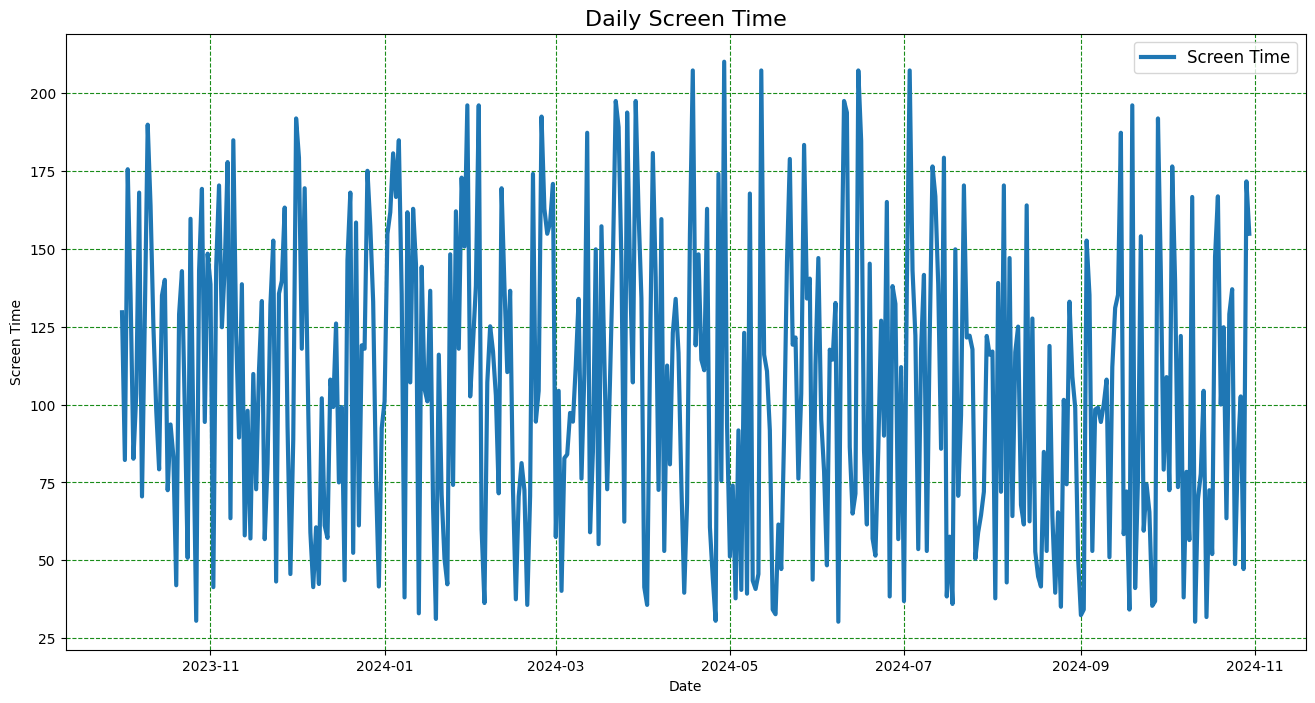

In [ ]:
InstagramDataframe['Date'] = pd.to_datetime(InstagramDataframe['Date'])
InstagramDataframe = InstagramDataframe.sort_values(by='Date')

# Figuring
plt.figure(figsize=(16, 8))
plt.plot(InstagramDataframe['Date'], InstagramDataframe['Screen Time (minutes)'], label='Screen Time', linewidth=3)
plt.title('Daily Screen Time', fontsize=16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Screen Time', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.9, color="green")
plt.legend(fontsize=12)


# Show the plot
plt.show()


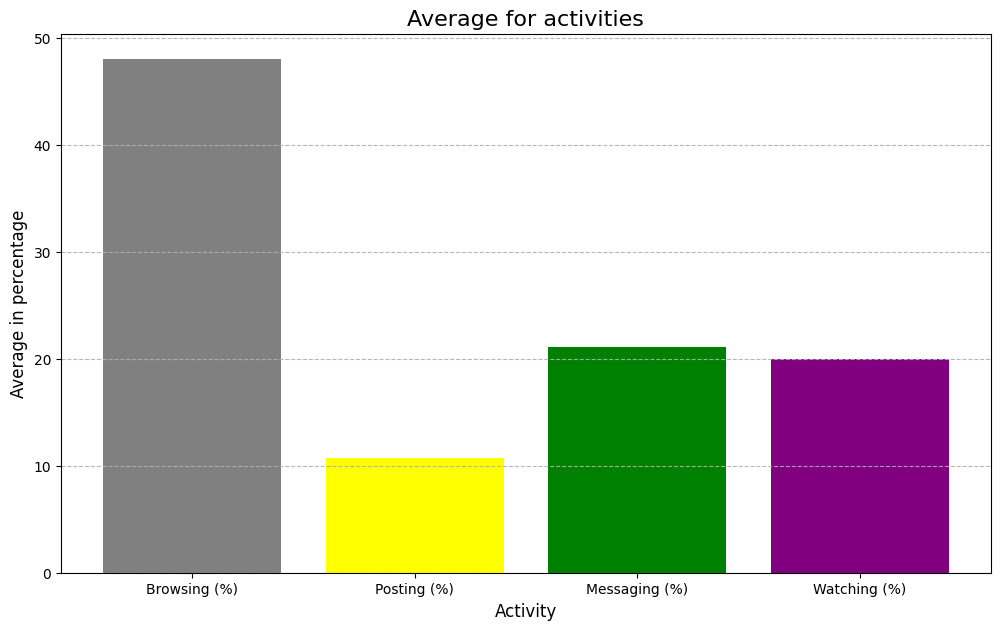

In [ ]:
Willused = ["Browsing (%)", "Posting (%)", "Messaging (%)", "Watching (%)"]
text1 = "Screen Time (minutes)"
text2 = "Likes"
colors = ['grey', 'yellow', 'green', 'purple']
#Mean calculation for all activities
meaned = InstagramDataframe[Willused].mean()

#Figuring
plt.figure(figsize=(12, 7))
plt.bar(meaned.index, meaned.values, color=colors)
plt.title('Average for activities', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Average in percentage', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True,axis='y', linestyle='--', alpha=0.9)
plt.show()


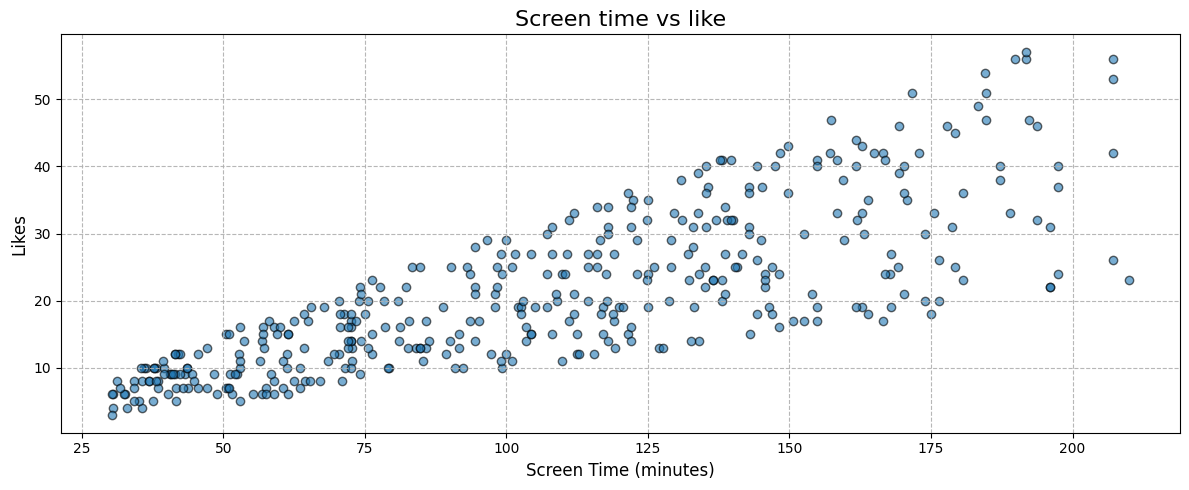

In [ ]:
# Figuring
plt.figure(figsize=(12, 5))
size  =12
plt.scatter(InstagramDataframe[text1], InstagramDataframe[text2], alpha=0.6, edgecolor='black')
plt.title(f'Screen time vs like', fontsize=16)

plt.xlabel(text1, fontsize=size)
plt.ylabel(text2, fontsize=size)

plt.grid(visible=True, linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


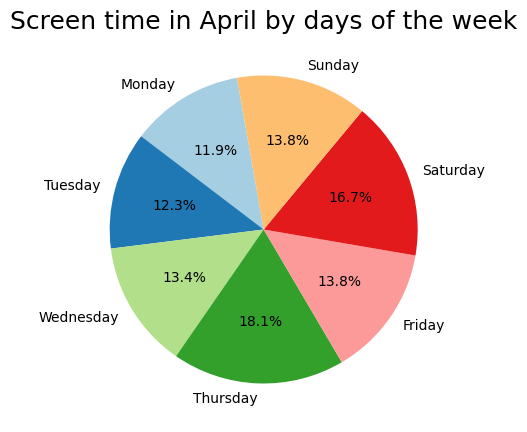

In [ ]:

# Getting april data
Newone = InstagramDataframe[InstagramDataframe['Date'].dt.month == 4]

# Grouping
uniteddata = Newone.groupby(InstagramDataframe['Date'].dt.day_name())[['Screen Time (minutes)', 'Likes']].mean()

#Check data is sorted
Daysordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
uniteddata = uniteddata.reindex(Daysordered).dropna()

Values = uniteddata['Screen Time (minutes)']
Daysinwekk = uniteddata.index

# Figuring
plt.figure(figsize=(7, 5))
plt.pie(Values,labels=Daysinwekk,autopct='%1.1f%%',startangle=100,colors=plt.cm.Paired.colors)
plt.title("Screen time in April by days of the week", fontsize=18)
plt.show()


<ipython-input-59-5250893b7bea>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  InstagramDataframe.groupby([InstagramDataframe['Date'].dt.day_name(), 'Active Hour'])


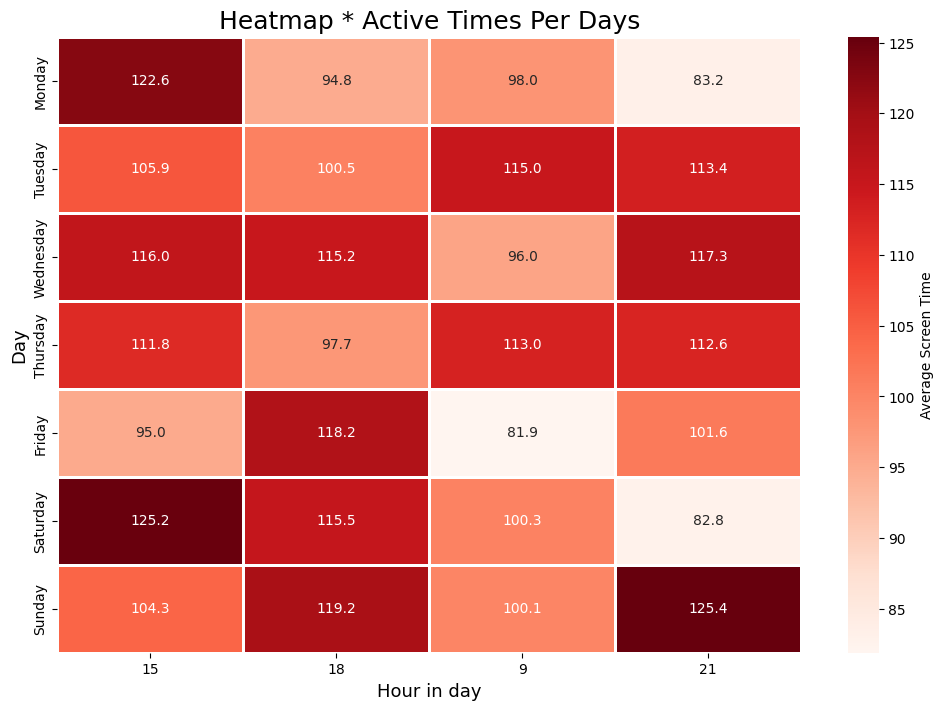

In [ ]:
#Times
Times = {"Morning": 9,"Afternoon": 15,"Evening": 18,"Night": 21}
InstagramDataframe['Active Hour'] = InstagramDataframe['Most Active Time'].map(Times)
Containedvalues = (
    InstagramDataframe.groupby([InstagramDataframe['Date'].dt.day_name(), 'Active Hour'])
    ['Screen Time (minutes)']
    .mean()
    .unstack(fill_value=0)
)
#Check data is sorted
sirali = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Containedvalues = Containedvalues.reindex(sirali)
#Figuring
plt.figure(figsize=(12, 8))
sns.heatmap(Containedvalues,annot=True,fmt=".1f",cmap="Reds",linewidths=0.8,cbar_kws={'label': 'Average Screen Time'})
plt.title('Heatmap * Active Times Per Days', fontsize=18)
plt.xlabel('Hour in day', fontsize=13)
plt.ylabel('Day', fontsize=13)
plt.xticks(rotation=0)
plt.show()


**5. Machine Learning**

In [ ]:
#Feature selection
Clustattributes = ["Screen Time (minutes)", "Browsing (%)", "Posting (%)", "Messaging (%)", "Watching (%)"]
#Standardizing for cluster
scaler = StandardScaler()
attributesthatarescaled = scaler.fit_transform(InstagramDataframe[Clustattributes])
#Do K Means Cluster
K = KMeans(n_clusters=3, random_state=42)
InstagramDataframe['cluster'] = K.fit_predict(attributesthatarescaled)
# Analyizng part
Statistics = InstagramDataframe.groupby('cluster')[Clustattributes].mean()
print("Cluster staticstics = ")
print(Statistics)


Cluster staticstics = 
         Screen Time (minutes)  Browsing (%)  Posting (%)  Messaging (%)  \
cluster                                                                    
0                   109.348993     47.824161     9.314765      17.607383   
1                   103.002685     52.539597    12.313423      20.378859   
2                   105.665306     41.468367    10.655102      27.675510   

         Watching (%)  
cluster                
0           25.193289  
1           14.713423  
2           20.212245  


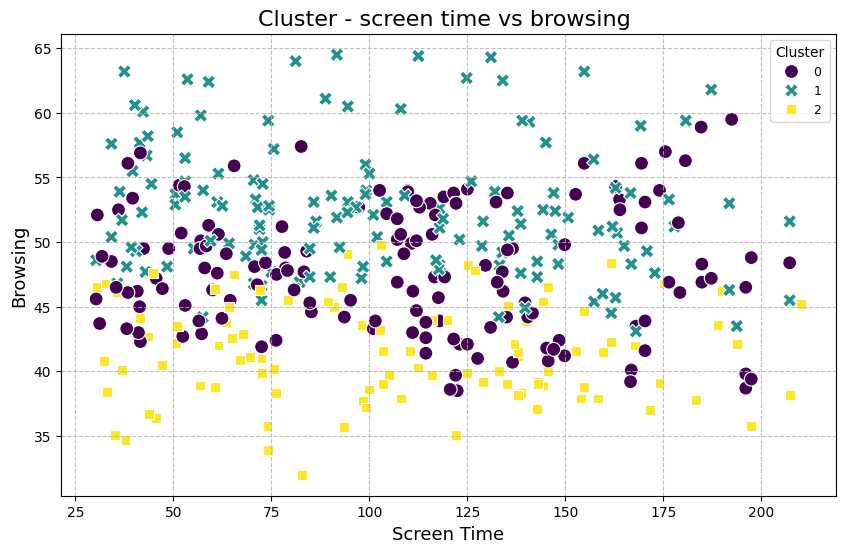

In [ ]:
#Figuring
plt.figure(figsize=(10, 6))
sns.scatterplot(data=InstagramDataframe,x="Screen Time (minutes)",y="Browsing (%)",hue="cluster",palette="viridis",style="cluster",s=100)
plt.title('Cluster - screen time vs browsing ', fontsize=16)
plt.xlabel('Screen Time', fontsize=13)
plt.ylabel('Browsing', fontsize=13)
plt.legend(title='Cluster', fontsize=9)
plt.grid(visible=True, linestyle='--', alpha=0.8)

plt.show()


In [ ]:
# attributes
attributes = ["Browsing (%)", "Posting (%)", "Messaging (%)", "Watching (%)", "Number of Sessions", "x1"]
aim = "Screen Time (minutes)"
InstagramDataframe['x1'] = LabelEncoder().fit_transform(InstagramDataframe['Most Active Time'])
randstate = 42
est = 100
# Split to sets
X = InstagramDataframe[attributes]
y = InstagramDataframe[aim]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=randstate)

# Decision tree regression
Decisiontree = DecisionTreeRegressor(random_state=randstate)

Decisiontree.fit(Xtrain, ytrain)

Predictionsof = Decisiontree.predict(Xtest)


#Statistics of decision tree model
Mymse = mean_squared_error(ytest, Predictionsof)
R2 = r2_score(ytest, Predictionsof)

#Random forest regressor model
Forstmodel = RandomForestRegressor(random_state=randstate, n_estimators=est)
Forstmodel.fit(Xtrain, ytrain)
Forstprediction = Forstmodel.predict(Xtest)

# Evaluate random forest model
Forstmse = mean_squared_error(ytest, Forstprediction)
ForstR = r2_score(ytest, Forstprediction)
print("Random forest model evaluation = ")
print(f"Mean squared error = {Forstmse:.2f}")
print(f"R squared = {ForstR:.2f}")


print("Decision tree model evaluation = ")
print(f"Mean squared error = {Mymse:.2f}")
print(f"R squared = {R2:.2f}")


Random forest model evaluation = 
Mean squared error = 276.48
R squared = 0.86
Decision tree model evaluation = 
Mean squared error = 307.62
R squared = 0.84
